In [1]:
%pylab inline
import numpy as np
import netCDF4 as netCDF  # file format
import tracpy
import tracpy.plotting
from tracpy.tracpy_class import Tracpy
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
# Location of TXLA model output file and grid, on a thredds server.
loc = 'http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg'
# Goes up to 1 January 2017

In [3]:
# Number of days to run the drifters.
ndays = 60

# Start date in date time formatting
# date = datetime.datetime(2009, 11, 25, 0)   # 25 November 2009
date = datetime.datetime(2016, 7, 25, 0)    # 25 July 2016

# Time between outputs
tseas = 3600 # 1 hour between outputs, in seconds 

# Time units
time_units = 'seconds since 1970-01-01'

In [4]:
# Sets a smaller limit than between model outputs for when to force interpolation if hasn't already occurred.
nsteps = 5
# Controls the sampling frequency of the drifter tracks.
N = 1
# Use ff = 1 for forward in time and ff = -1 for backward in time.
ff = -1

In [5]:
ah = 0. # m^2/s HORIZONTAL
av = 0. # m^2/s VERTICAL

# turbulence/diffusion flag
doturb = 0

In [6]:
# simulation name, used for saving results into netcdf file
name = 'fgb'

In [7]:
# for 3d flag, do3d=0 makes the run 2d and do3d=1 makes the run 3d
do3d = 0

## Choose method for vertical placement of drifters
z0 = 's' # I know the size from checking #'s after eliminating those outside domain ' #'z' #'salt' #'s' 
num_layers = 30
zpar = num_layers-1 # 29 #-10 #grid['km']-1 # 30 #grid['km']-1

# #### 3D Sample Options ####
# # for 3d flag, do3d=0 makes the run 2d and do3d=1 makes the run 3d
# do3d = 1

# ## Choose method for vertical placement of drifters
# z0 = np.zeros(681) # I know the size from checking #'s after eliminating those outside domain ' #'z' #'salt' #'s' 
# num_layers = 30
# zpar = 'fromZeta' #num_layers-1 # 29 #-10 #grid['km']-1 # 30 #grid['km']-1
# ####

In [8]:
proj = tracpy.tools.make_proj('nwgom-pyproj')

In [9]:
# Read in grid
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

# Initialize Tracpy class
tp = Tracpy(loc, grid, name=name, tseas=tseas, ndays=ndays, nsteps=nsteps,
            N=N, ff=ff, ah=ah, av=av, doturb=doturb, do3d=do3d, z0=z0, zpar=zpar, time_units=time_units)

## Entire region

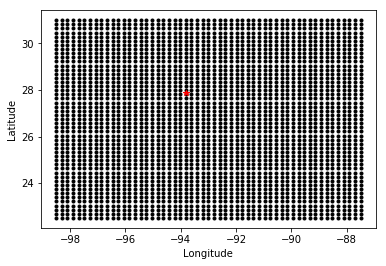

-- / 2695  drifters NaN-ed out.


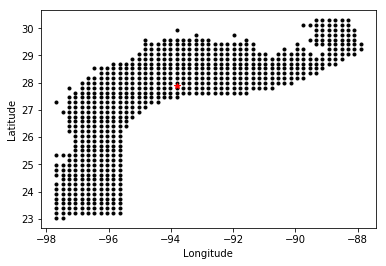

In [10]:
# Input starting locations as real space lon,lat locations
lon0, lat0 = np.meshgrid(np.linspace(-98.5,-87.5,55), \
                            np.linspace(22.5,31,49)) # whole domain, 20 km
plt.plot(lon0, lat0, marker='.', color='k', linestyle='none')
plt.plot(-93.8147,27.884, marker="*", color='r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
# Eliminate points that are outside domain or in masked areas
lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
plt.plot(lon0, lat0, marker='.', color='k', linestyle='none')
plt.plot(-93.8147,27.884, marker="*", color='r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Zoom in on the banks

0 / 50  drifters NaN-ed out.


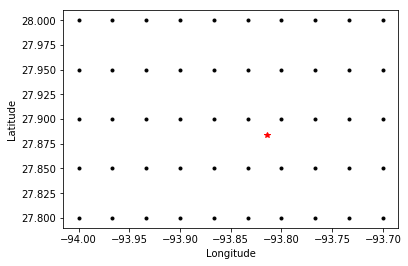

In [11]:
lon0, lat0 = np.meshgrid(np.linspace(-94,-93.7,10), \
                            np.linspace(27.8,28,5)) # whole domain, 20 km
lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
plt.plot(lon0, lat0, marker='.', color='k', linestyle='none')
plt.plot(-93.8147,27.884, marker="*", color='r')
#plt.xlim(-98,-88)
#plt.ylim(23,31)
plt.xlabel("Longitude")   # 28.9 km
plt.ylabel("Latitude")    # 22.2 km
plt.show()

# do every 500 m horizontally

In [12]:
# Note in timing that the grid was already read in
lonp, latp, zp, t, T0, U, V = tracpy.run.run(tp, date, lon0, lat0)

/opt/tracpy/tracpy/inout.py:75: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  istart = find(dates <= date)[-1]


Using GCM model output index  0
Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output index  29
Using GCM model outp

Using GCM model output index  245
Using GCM model output index  246
Using GCM model output index  247
Using GCM model output index  248
Using GCM model output index  249
Using GCM model output index  250
Using GCM model output index  251
Using GCM model output index  252
Using GCM model output index  253
Using GCM model output index  254
Using GCM model output index  255
Using GCM model output index  256
Using GCM model output index  257
Using GCM model output index  258
Using GCM model output index  259
Using GCM model output index  260
Using GCM model output index  261
Using GCM model output index  262
Using GCM model output index  263
Using GCM model output index  264
Using GCM model output index  265
Using GCM model output index  266
Using GCM model output index  267
Using GCM model output index  268
Using GCM model output index  269
Using GCM model output index  270
Using GCM model output index  271
Using GCM model output index  272
Using GCM model output index  273
Using GCM mode

Using GCM model output index  486
Using GCM model output index  487
Using GCM model output index  488
Using GCM model output index  489
Using GCM model output index  490
Using GCM model output index  491
Using GCM model output index  492
Using GCM model output index  493
Using GCM model output index  494
Using GCM model output index  495
Using GCM model output index  496
Using GCM model output index  497
Using GCM model output index  498
Using GCM model output index  499
Using GCM model output index  500
Using GCM model output index  501
Using GCM model output index  502
Using GCM model output index  503
Using GCM model output index  504
Using GCM model output index  505
Using GCM model output index  506
Using GCM model output index  507
Using GCM model output index  508
Using GCM model output index  509
Using GCM model output index  510
Using GCM model output index  511
Using GCM model output index  512
Using GCM model output index  513
Using GCM model output index  514
Using GCM mode

Using GCM model output index  727
Using GCM model output index  728
Using GCM model output index  729
Using GCM model output index  730
Using GCM model output index  731
Using GCM model output index  732
Using GCM model output index  733
Using GCM model output index  734
Using GCM model output index  735
Using GCM model output index  736
Using GCM model output index  737
Using GCM model output index  738
Using GCM model output index  739
Using GCM model output index  740
Using GCM model output index  741
Using GCM model output index  742
Using GCM model output index  743
Using GCM model output index  744
Using GCM model output index  745
Using GCM model output index  746
Using GCM model output index  747
Using GCM model output index  748
Using GCM model output index  749
Using GCM model output index  750
Using GCM model output index  751
Using GCM model output index  752
Using GCM model output index  753
Using GCM model output index  754
Using GCM model output index  755
Using GCM mode

Using GCM model output index  968
Using GCM model output index  969
Using GCM model output index  970
Using GCM model output index  971
Using GCM model output index  972
Using GCM model output index  973
Using GCM model output index  974
Using GCM model output index  975
Using GCM model output index  976
Using GCM model output index  977
Using GCM model output index  978
Using GCM model output index  979
Using GCM model output index  980
Using GCM model output index  981
Using GCM model output index  982
Using GCM model output index  983
Using GCM model output index  984
Using GCM model output index  985
Using GCM model output index  986
Using GCM model output index  987
Using GCM model output index  988
Using GCM model output index  989
Using GCM model output index  990
Using GCM model output index  991
Using GCM model output index  992
Using GCM model output index  993
Using GCM model output index  994
Using GCM model output index  995
Using GCM model output index  996
Using GCM mode

Using GCM model output index  1203
Using GCM model output index  1204
Using GCM model output index  1205
Using GCM model output index  1206
Using GCM model output index  1207
Using GCM model output index  1208
Using GCM model output index  1209
Using GCM model output index  1210
Using GCM model output index  1211
Using GCM model output index  1212
Using GCM model output index  1213
Using GCM model output index  1214
Using GCM model output index  1215
Using GCM model output index  1216
Using GCM model output index  1217
Using GCM model output index  1218
Using GCM model output index  1219
Using GCM model output index  1220
Using GCM model output index  1221
Using GCM model output index  1222
Using GCM model output index  1223
Using GCM model output index  1224
Using GCM model output index  1225
Using GCM model output index  1226
Using GCM model output index  1227
Using GCM model output index  1228
Using GCM model output index  1229
Using GCM model output index  1230
Using GCM model outp

Using GCM model output index  1438
Using GCM model output index  1439

Simulation name:  fgb

Total run time: 1057.942083 (seconds)
---------------------------------------------
Time spent on:
	1: Preparing for simulation    		2.1642 (0.2046%)
	2: Preparing for model step    		1054.3609 (99.6615%)
	3: Stepping, using TRACMASS    		1.0667 (0.1008%)
	4: Processing after model step 		0.0900 (0.0085%)
	5: Processing after simulation 		0.2602 (0.0246%)


/opt/tracpy/tracpy/tools.py:214: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  xpc.append(xp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:215: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ypc.append(yp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:210: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  xpc.append(xp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:211: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ypc.append(yp[idrift, find(ind3)[ind]])


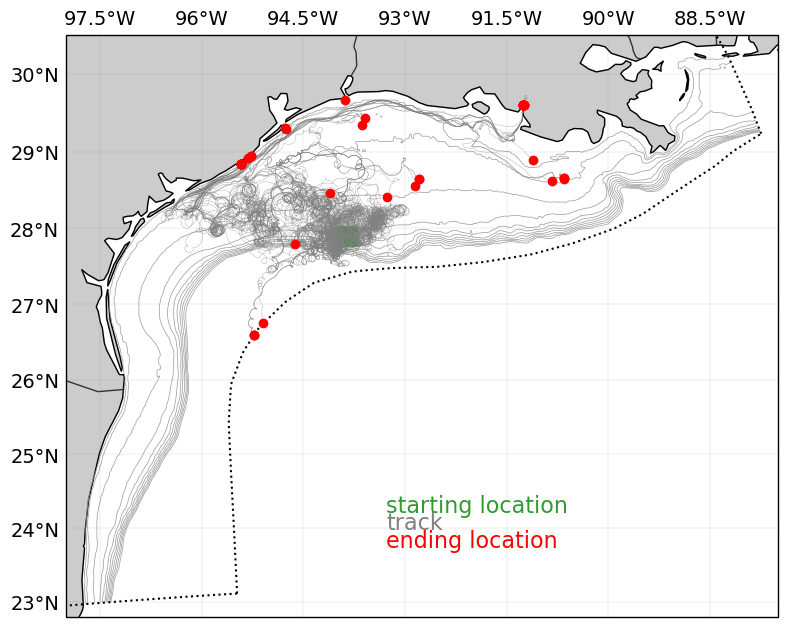

In [13]:
fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
ax = tracpy.plotting.background(grid, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
               col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m')
tracpy.plotting.tracks(lonp, latp, tp.name, grid, fig=fig, ax=ax)
tracpy.plotting.tracks?

In [14]:
d = netCDF.Dataset('tracks/fgb.nc')

In [15]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): ntrac(50), nt(1441), xul(670), yul(191), xvl(671), yvl(190)
    variables(dimensions): float64 lonp(ntrac,nt), float64 latp(ntrac,nt), float64 tp(ntrac,nt), float64 T0(ntrac), float64 U(xul,yul), float64 V(xvl,yvl), int32 nsteps(), int32 N(), int32 ff(), float64 tseas(), float64 ah(), float64 av(), int32 do3d(), int32 doturb(), int32 doperiodic()
    groups: 

In [16]:
d['lonp'][0,:] # ending location

array([-94.0000133 , -93.9894581 , -93.98045215, ..., -91.24997574,
       -91.25001618, -91.25005661])

In [17]:
d['lonp'][:,0] # starting location

array([-94.0000133 , -93.96666772, -93.93334519, -93.90000153,
       -93.86667753, -93.83333501, -93.80001085, -93.76666729,
       -93.73334469, -93.7000031 , -94.00000323, -93.96667473,
       -93.93334066, -93.90000672, -93.86667461, -93.83333995,
       -93.80000661, -93.76667515, -93.73333728, -93.70001209,
       -94.00000477, -93.9666784 , -93.93333557, -93.90001133,
       -93.86666668, -93.8333421 , -93.80000002, -93.76667244,
       -93.73333653, -93.70000317, -94.00001198, -93.96666747,
       -93.93334643, -93.90000287, -93.86667585, -93.8333352 ,
       -93.80000353, -93.76666697, -93.73333381, -93.70000356,
       -94.00000245, -93.96667641, -93.9333382 , -93.90000781,
       -93.86666893, -93.83333397, -93.80000262, -93.7666677 ,
       -93.73334158, -93.70000309])

In [18]:
d['tp'][0,:]

array([1.4694048e+09, 1.4694012e+09, 1.4693976e+09, ..., 1.4642280e+09,
       1.4642244e+09, 1.4642208e+09])

In [19]:
dates = netCDF.num2date(d['tp'][0,:], d['tp'].units)

In [20]:
dates

array([datetime.datetime(2016, 7, 25, 0, 0, 1),
       datetime.datetime(2016, 7, 24, 23, 0, 1),
       datetime.datetime(2016, 7, 24, 22, 0, 1), ...,
       datetime.datetime(2016, 5, 26, 2, 0, 1),
       datetime.datetime(2016, 5, 26, 1, 0, 1),
       datetime.datetime(2016, 5, 26, 0, 0, 1)], dtype=object)

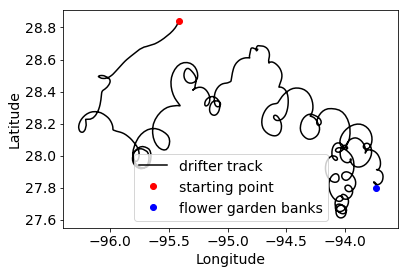

In [21]:
plt.plot(d['lonp'][8,:].T, d['latp'][8,:].T, 'k')
#plt.xlim(-97,-89)
#plt.ylim(23,31)
#plt.ylim(26,)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.plot(d['lonp'][8,:].T[-1], d['latp'][8,:].T[-1], "or")
plt.plot(d['lonp'][8,:].T[0], d['latp'][8,:].T[0], "ob")
plt.legend(['drifter track','starting point','flower garden banks'])
plt.show()

# rows drifters
# col times

In [22]:
tracpy.plotting.tracks?